In [1]:
import B2D
import bitsetting
import numpy as np
import random
from skimage import io,transform
from matplotlib import pyplot as plt
from xxhash import xxh32
import nbimporter
import Toollib 
import pandas as pd

In [2]:
import os, re
imagelist = os.listdir('image')
imagelist = [re.sub(r'.tiff', '', i) for i in imagelist]

In [3]:
imagelist

['Baboon', 'house', 'Jet', 'Lena', 'Peppers', 'Sailboat', 'Splash', 'Tiffany']

In [13]:
def AVGI(Graph):
    path = 'image/'+Graph+'.tiff'
    I=io.imread(path)
    Stego = I.copy()

    p = 0
    MSE = 0
    F = 0
    N = 0
    X = 0

    for i in range(Stego.shape[0]):
        for j in range(Stego.shape[1]):
            Gray = I[i,j,0]*0.299+I[i,j,1]*0.587+I[i,j,2]*0.114
            G_round = round(Gray)
            ac = Toollib.hashB(np.array([G_round]),8)     
            bin = B2D.Dec2Bin(ac,8)
            upper = bin[0:4]
            lower = bin[4:8]
            
            k=[]
            Stego[i,j,0] = bitsetting.lsbset(Stego[i,j,0],upper)
            k.append(Stego[i,j,0])
            Stego[i,j,2] = bitsetting.lsbset(Stego[i,j,2],lower)  
            k.append(Stego[i,j,2])
            g_bar = int((Gray - 0.299*k[0] - 0.114*k[1])/0.587)
            
            if(round(0.299*k[0]+0.587*g_bar+0.114*k[1]) < round(Gray)):
                g_bar += 1
            elif(round(0.299*k[0]+0.587*g_bar+0.114*k[1]) > round(Gray)):
                g_bar -= 1

            if(g_bar > 255 or g_bar < 0):
                p += 1
                ac_fold = Toollib.fold(ac,2)
                Stego[i,j] = Toollib.remedy(Stego[i,j,0],Stego[i,j,1],Stego[i,j,2],ac_fold)
            else:
                Stego[i,j,1] = g_bar

            # print(f"I:{I[i,j]}, S:{Stego[i,j]}, g_bar:{(Gray - 0.299*k[0] - 0.114*k[1])/0.587}, k:{k}")

            X = 0
            delta = int(Stego[i,j,2]) - int(I[i,j,2])
            X += delta**2
            MSE += delta ** 2
            delta = int(Stego[i,j,1]) - int(I[i,j,1])
            X += delta**2
            MSE += delta ** 2 
            delta = int(Stego[i,j,0]) - int(I[i,j,0])
            X += delta**2           
            MSE += delta ** 2    
            if(X > 128):
                N += 1                                    

    MSE /= (Stego.shape[0]*Stego.shape[1]*3)
    PSNR = 10 * np.log10(65025/MSE)
    print(f"PSNR:{PSNR} , F:{p} , X:{N}")

    with open("processing_data/"+Graph+".txt","w") as file:
        file.write(f"PSNR: {PSNR}\n")
        file.write(f"outliers: {p}")


    io.imshow(Stego)
    io.show()
    io.imsave('processing_image/'+Graph+'.png',Stego)

PSNR:33.15369104998766 , F:92 , X:73483


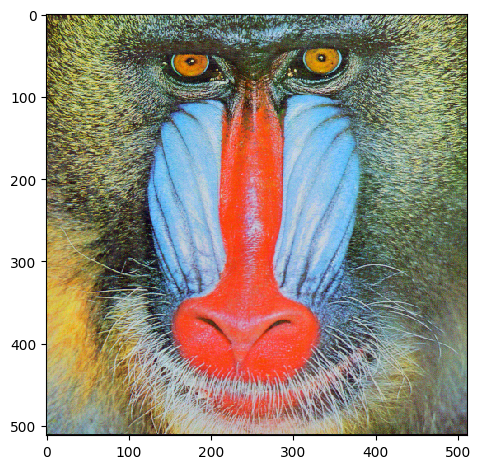

PSNR:33.064497641340814 , F:465 , X:79215


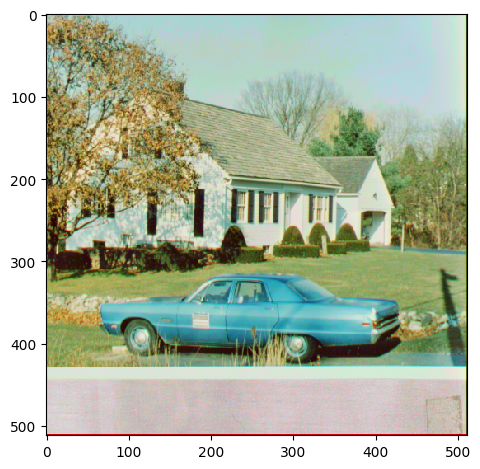

PSNR:32.80217819022798 , F:226 , X:84489


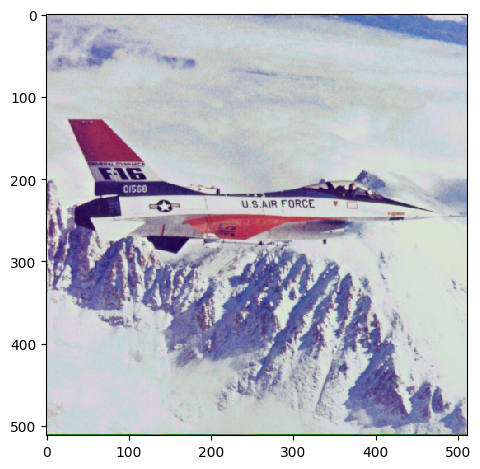

PSNR:32.96270876289781 , F:3 , X:78891


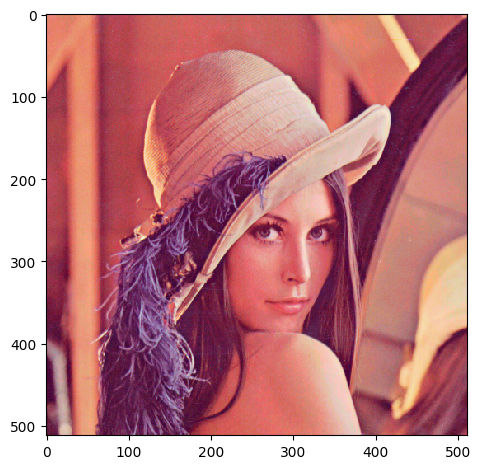

PSNR:33.18564175836813 , F:9321 , X:72676


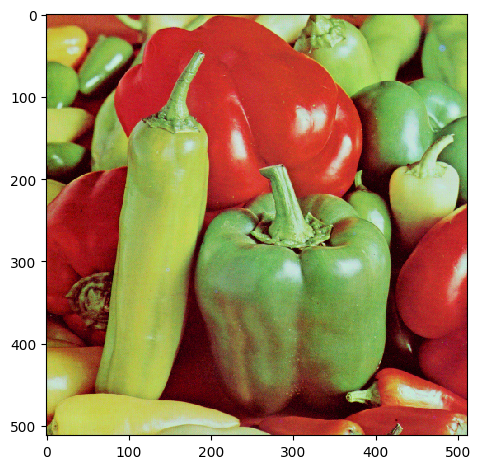

PSNR:33.163337764894656 , F:880 , X:73274


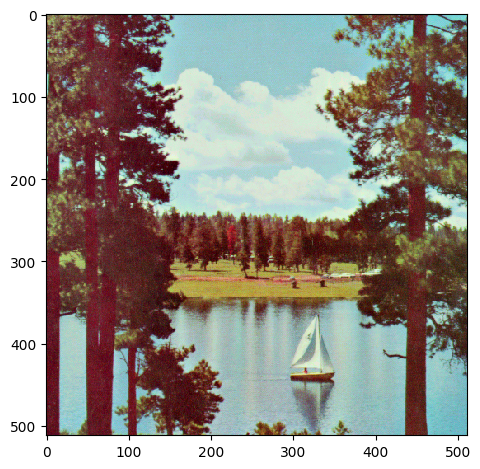

PSNR:32.93136049825173 , F:6266 , X:79978


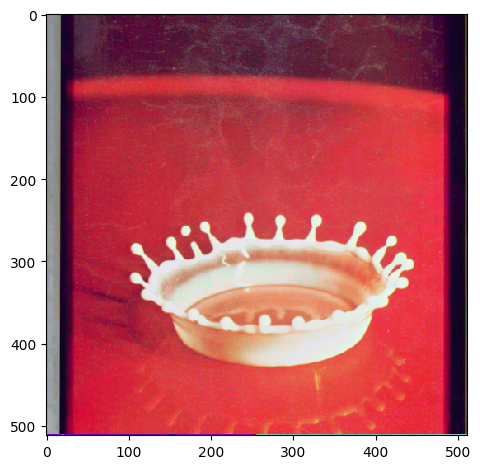

PSNR:32.30643004604071 , F:23284 , X:97136


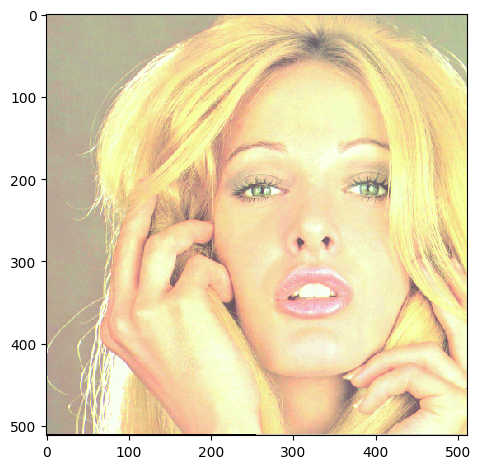

In [9]:
for image in imagelist:
    AVGI(image)